In [1]:
import albumentations as A
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
folder_path = Path("./jumpingjack.npy")
arr = np.load(folder_path)
N, F, H, W, C = arr.shape
print(arr.shape)
arr = arr.reshape(-1, H, W, C)

(84, 10, 144, 180, 3)


### Define transformation

In [3]:
transforms = [A.HorizontalFlip(p=1.0)]

In [4]:
transformed = []
for transform in transforms:
    results = np.zeros_like(arr)
    for i, frame in enumerate(arr):
        results[i] = transform(image=frame)['image']
    transformed.append(results)

transformed = np.concatenate(transformed, axis=0)
transformed = transformed.reshape(-1, F, H, W, C)
arr = arr.reshape(N, F, H, W, C)
print(transformed.shape[0])

84


### Verify the transformation has happened

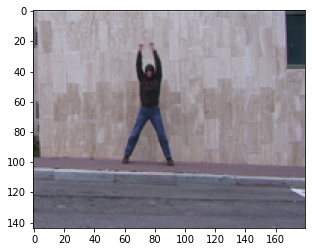

In [5]:
plt.imshow(arr[0, 0])

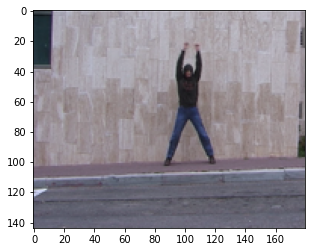

In [6]:
plt.imshow(transformed[0, 0])

### Concat and save as numpy array

In [7]:
np.save("flipped_jumpingjack", np.concatenate([arr, transformed], axis=0))

In [8]:
np.load("flipped_jumpingjack.npy").shape

(168, 10, 144, 180, 3)